In [2]:
import numpy as np
import cupy as cp
import time

In [76]:
x=[]
for n in range(2,101):
    t=time.time()
    a=cp.random.rand(n,n)
    b=cp.random.rand(n,n)
    c=cp.matmul(a,b)
    x.append(time.time()-t)
print(time.time()-t)

0.0003211498260498047


In [77]:
y=[]
for n in range(2,101):
    t=time.time()
    a=np.random.rand(n,n)
    b=np.random.rand(n,n)
    c=np.matmul(a,b)
    y.append(time.time()-t)
print(time.time()-t)

0.0005497932434082031


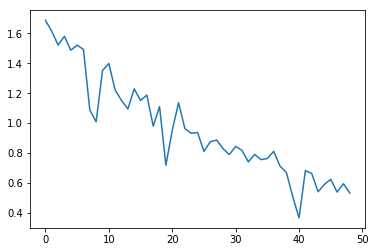

In [79]:
import matplotlib.pyplot as plt
plt.plot(np.divide(x,y)[50:])
plt.show()

In [72]:
x = cp.array([[1,2],[2,4]],dtype=np.float32)
y = cp.array([[1,2],[2,4]],dtype=np.float32)
kernel = cp.ElementwiseKernel(
    'float32 *x, float32 *y', 'float32 z',
    '''
    z=x[0]+y[0];
    }''', 'my_kernel')
kernel(x, y)

CompileException: /tmp/tmphqvivfn7/kern.cu(7): error: expected a ")"

/tmp/tmphqvivfn7/kern.cu(9): error: identifier "_ind" is undefined

/tmp/tmphqvivfn7/kern.cu(11): error: pointer to reference is not allowed

/tmp/tmphqvivfn7/kern.cu(12): error: pointer to reference is not allowed

/tmp/tmphqvivfn7/kern.cu(13): error: identifier "_raw_z" is undefined

/tmp/tmphqvivfn7/kern.cu(19): error: expected a declaration

At end of source: warning: parsing restarts here after previous syntax error

6 errors detected in the compilation of "/tmp/tmphqvivfn7/kern.cu".


In [ ]:
import pandas as pd
t=time.time()
a=pd.read_csv('train.csv',header=None).astype("float32")
print(np.shape(a))
print(time.time()-t)

In [ ]:
t=time.time()
fail = np.array(list(np.loadtxt("train.csv", delimiter=","))).astype("float32")
print(np.shape(a))
print(time.time()-t)

In [ ]:
import pandas as pd
t=time.time()
a.to_csv('hello1.csv')
print(time.time()-t)

In [ ]:
f=open('hello2.csv','ab')
t=time.time()
np.savetxt(f,a,delimiter=',')
print(time.time()-t)

In [ ]:
import pandas as pd
t=time.time()
a=np.array(pd.read_csv('eval_label.csv',header=None)).astype("float32")
print(np.shape(a))
a=np.reshape(a,(21,340))
print(np.shape(a))
print(time.time()-t)

In [ ]:
a=cp.array([[[1,2,3],[2,3,4]],[[1,2,3],[2,3,8]]])
b=cp.array([[[1,2,3],[2,3,5]],[[1,2,8],[2,3,7]]])
np.shape(a)

In [ ]:
a=cp.asnumpy(a)
b=cp.asnumpy(b)
print(np.shape(a))
print(np.shape(b))

In [ ]:
c=np.cross(a,b,axisa=2,axisb=2)
c=cp.array(c)
x=[1,0,0]
print(c)

In [ ]:
cp.dot(a,x)

In [22]:
t=time.time()
for i in range(1000):
    a=cp.random.rand(5000,5000)
    a=a*np.pi
print(time.time()-t)

3.4340617656707764


In [26]:
t=time.time()
for i in range(1):
    a=np.random.rand(5000,5000,3)
    b=np.random.rand(5000,5000,3)
    c=np.cross(a,b,axisa=2,axisb=2)
print(time.time()-t)

3.8951575756073


In [57]:
L=2000
x = cp.ones((L, L),dtype='float32')
kernel = cp.ElementwiseKernel(
     'float32 x, int16 L', 'float32 z',
     '''
     int b=i%L;
     int a=(i-b)/L;
     if ((a+b)%2 == 0) {
       z = 1;
     } 
     else {
       z = 0;
     }''', 'my_kernel')
kernel(x,L)

array([[ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  1.]], dtype=float32)

In [29]:
add_reverse(cp.random.rand(10),cp.random.rand(10))

array([ 1.37475072,  0.58344262,  0.18554245,  0.30868634,  1.00635175,
        0.99147514,  1.20910769,  0.34309083,  0.929992  ,  0.28285548])

In [23]:
cross = cp.ElementwiseKernel(
     'raw float64 a,raw float64 b, float64 c', '',
     '''
     int z=i%3;
     if (z==0){
     c=a[i+1]*b[i+2]-a[i+2]*b[i+1];
     }
     else if (z==1){
     c=a[i+1]*b[i-1]-a[i-1]*b[i+1];
     }
     else{
     c=a[i-2]*b[i-1]-a[i-1]*b[i-2];
     }
     ''', 'my_kernel')

In [24]:
L=24
a=cp.random.rand(24,24,3)
b=cp.random.rand(24,24,3)
c=cp.random.rand(24,24,3)
cross(a,b,c)

()

In [25]:
print(a,b,c)

[[[ 0.99247806  0.53264717  0.53177759]
  [ 0.72224179  0.05942899  0.08072111]
  [ 0.9400539   0.07501623  0.29620522]
  ..., 
  [ 0.66165411  0.61366677  0.39214291]
  [ 0.0287389   0.34898722  0.34993167]
  [ 0.07587204  0.90661688  0.98384034]]

 [[ 0.16852452  0.49658299  0.81536983]
  [ 0.29180444  0.18001766  0.43427931]
  [ 0.81237459  0.73307192  0.93356688]
  ..., 
  [ 0.58710443  0.00610075  0.38988382]
  [ 0.58562278  0.36574392  0.45294151]
  [ 0.62564738  0.13898295  0.22798594]]

 [[ 0.79034006  0.73123325  0.69302634]
  [ 0.77177023  0.19644689  0.42457469]
  [ 0.67601527  0.44980085  0.20371852]
  ..., 
  [ 0.43361341  0.84862519  0.07967181]
  [ 0.95270987  0.25319245  0.23835799]
  [ 0.18567576  0.12098021  0.16667143]]

 ..., 
 [[ 0.47223448  0.64445671  0.03479087]
  [ 0.80123184  0.70926635  0.78878182]
  [ 0.55479435  0.76003686  0.90246412]
  ..., 
  [ 0.32061068  0.38071027  0.51734548]
  [ 0.27012142  0.96873176  0.85309302]
  [ 0.51178299  0.15217777  0.38146

In [4]:
f=open('hello.csv','ab')
a=cp.random.rand(1000,1000,3)
t=time.time()
a=cp.asnumpy(cp.reshape(a,(1,-1)))
np.savetxt(f,a,delimiter=',')
print(time.time()-t)

3.1227004528045654


In [5]:
a=cp.random.rand(6,6)
print(a)

[[ 0.00278252  0.43299657  0.0618159   0.27255134  0.78513424  0.82940055]
 [ 0.19966074  0.43894284  0.50471028  0.82550662  0.83203446  0.3327778 ]
 [ 0.91638776  0.72779607  0.27271577  0.50657244  0.33171954  0.32705667]
 [ 0.32101096  0.82958041  0.21398058  0.98748115  0.604119    0.71209299]
 [ 0.3166891   0.08755292  0.96288272  0.83967379  0.23674291  0.01273814]
 [ 0.92377914  0.18890275  0.29028929  0.494937    0.30906967  0.02772619]]


In [9]:
print(cp.diagonal(a,offset=5))

[ 0.82940055]


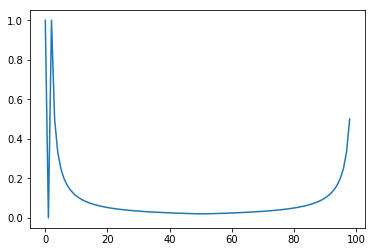

In [17]:
a=cp.random.rand(50)
b=cp.random.rand(1000,50)
t=time.time()
print(cp.sum(a*b))
print(time.time()-t)

a=np.random.rand(50)
b=np.random.rand(1000,50)
t=time.time()
print(np.sum(a*b))
print(time.time()-t)

12726.038098448684
0.0033881664276123047
6336.294334140375
0.33052563667297363


In [9]:
a=np.random.rand(1000,1)
b=np.random.rand(1000,50)
a*b

array([[ 0.21126627,  0.25455955,  0.17677254, ...,  0.04494949,
         0.17233994,  0.19255673],
       [ 0.05290909,  0.30721169,  0.61262874, ...,  0.39841706,
         0.49804467,  0.36261075],
       [ 0.21562809,  0.20581112,  0.17619876, ...,  0.08490275,
         0.04247368,  0.17296178],
       ..., 
       [ 0.25725344,  0.41825522,  0.40507774, ...,  0.16801644,
         0.29943649,  0.06365073],
       [ 0.00378032,  0.04375743,  0.04187927, ...,  0.02460201,
         0.0087042 ,  0.01347729],
       [ 0.19277321,  0.11757169,  0.07173716, ...,  0.14549169,
         0.12028305,  0.01234387]])

In [8]:
a=np.random.rand(2,3,4)
b=np.random.rand(2,4)
for x,y in zip(a,b):
    print(np.shape(x),np.shape(y))

(3, 4) (4,)
(3, 4) (4,)


In [25]:
a=np.random.rand(5)
b=np.random.rand(5)

In [24]:
print(np.shape(b))

(5, 6, 3)


In [26]:
np.vectorize()

TypeError: 'numpy.ndarray' object is not callable